#GERAÇÃO DE LETRAS DE RAP A PARTIR DE UMA REDE NEURAL

A produção musical é uma tarefa complexa e vem sendo cada vez mais aprimorada e amparada por tecnologias auxiliares. A composição de letras de músicas é um exercício lógico, além da expressividade e essência transcrita. A vertente underground, traz consigo a originalidade e um ponto de vista crítico sobre situações cotidianas e, geralmente, é marginalizado pelo vocabulário ou com temas sensíveis. Este estudo explora o treinamento de uma LSTM para geração automatizada de letras de RAP, investigando os desafios e as oportunidades associadas a essa abordagem inovadora. Para alimentar essa rede neural foram utilizadas letras de música do grupo Racionais MC's, como forma de homenagem ao símbolo marcante que o grupo representa para o RAP nacional.

# Abordagens anteriores

Foram utilizadas algumas abordagens diferentes para o desenvolvimento deste trabalho antes de chegar na versão final do protótipo apresentado mais abaixo. Basicamente, a intenção era aproveitar das arquiteturas prontas dos modelos já existentes para ter uma geração de texto mais refinada e robusta. Porém, a limitação de hardware e ambientes de execução trouxeram problemas para a utilização destes modelos. Isso fez com que não pudessem ser aproveitados da maneira esperado, fazendo-se necessário a troca de abordagem.

## Utilização do modelo BERTimbau

A utilização deste modelo tinha a finalidade de geração de novas letras de RAP a partir da predição de labels [MASK] para tal. Inicialmente surgiram esperanças positivas, pois o modelo conseguia fazer a predição de palavras que completavam certas sentenças das letras contidas na base de dados. Não continham um score muito alto, mas acreditava-se que com o ajuste fino para enviesar o modelo no universo Racionais MC's este score seria maior, possibilitando a geração de novas letras coesas com a temática. Porém, a utilização deste modelo foi desencorajada pelo baixo indíce de acuráci a e todas as outras problemáticas que foram supracitadas. Seguem algumas informações visuais sobre os resultados do modelo.

### Testes de predição

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("rufimelo/Legal-BERTimbau-base")
model = AutoModelForMaskedLM.from_pretrained("rufimelo/Legal-BERTimbau-base")

pipe = pipeline('fill-mask', model=model, tokenizer=tokenizer)
pipe('Hoje eu sou ladrão, [MASK] 157')
#Acertou na 4 tentativa

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/863 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

[{'score': 0.06270178407430649,
  'token': 15212,
  'token_str': 'tenho',
  'sequence': 'Hoje eu sou ladrão, tenho 157'},
 {'score': 0.051007188856601715,
  'token': 123,
  'token_str': 'a',
  'sequence': 'Hoje eu sou ladrão, a 157'},
 {'score': 0.0490175262093544,
  'token': 712,
  'token_str': 'aos',
  'sequence': 'Hoje eu sou ladrão, aos 157'},
 {'score': 0.04188193008303642,
  'token': 4319,
  'token_str': 'artigo',
  'sequence': 'Hoje eu sou ladrão, artigo 157'},
 {'score': 0.023356139659881592,
  'token': 1328,
  'token_str': 'art',
  'sequence': 'Hoje eu sou ladrão, art 157'}]

In [ ]:
pipe = pipeline('fill-mask', model=model, tokenizer=tokenizer)
pipe('A [MASK] cheia, clareia as ruas do Capão')
#Acertou de primeira, porém com score baixo ainda.

[{'score': 0.22971633076667786,
  'token': 13943,
  'token_str': 'lua',
  'sequence': 'A lua cheia, clareia as ruas do Capão'},
 {'score': 0.2135608047246933,
  'token': 1991,
  'token_str': 'água',
  'sequence': 'A água cheia, clareia as ruas do Capão'},
 {'score': 0.06903935968875885,
  'token': 2954,
  'token_str': 'noite',
  'sequence': 'A noite cheia, clareia as ruas do Capão'},
 {'score': 0.05121872201561928,
  'token': 596,
  'token_str': 'tempo',
  'sequence': 'A tempo cheia, clareia as ruas do Capão'},
 {'score': 0.04503921791911125,
  'token': 7856,
  'token_str': 'Lua',
  'sequence': 'A Lua cheia, clareia as ruas do Capão'}]

## Utilização do modelo GPorTuguese-2

A utilização deste modelo tinha a finalidade de geração de novas letras de RAP a partir do propósito do modelo, geração de texto longo. A ideia parecia atrativa e com grande potencial, porém a utilização deste modelo, além das problemáticas supracitadas, não foi tão efetiva. O texto gerado não fazia muita relação com o vies que era desejado (gerar novas letras com similaridade às composições da base de dados). Por já possuir um extenso corpus pré-treinado, crê-se que seria necessário também a inclusão de um corpus mais parrudo, que contivesse letras de música de outros grupos de RAP, fazendo com que fosse necessário desviar da temática central, Racionais MC's. Seguem algumas informações visuais sobre os resultados do modelo.

### Testes de geração de texto

In [ ]:
from transformers import AutoTokenizer, AutoModelWithLMHead
import torch

tokenizer = AutoTokenizer.from_pretrained("pierreguillou/gpt2-small-portuguese")
model = AutoModelWithLMHead.from_pretrained("pierreguillou/gpt2-small-portuguese")

model.eval()

tokenizer_config.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/850k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/508k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1712: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
def format_output(output_tokens, tokenizer, tokens_per_line=8):
    decoded_text = tokenizer.decode(output_tokens.tolist(), skip_special_tokens=True)
    tokens = decoded_text.split()
    lines = [' '.join(tokens[i:i+tokens_per_line]) for i in range(0, len(tokens), tokens_per_line)]
    return '\n'.join(lines)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
text = "Tem que ser, tem que pá "
inputs = tokenizer(text, return_tensors="pt").to(device)

sample_outputs = model.generate(
    inputs.input_ids,
    pad_token_id=50256,
    do_sample=True,
    max_length=50,
    top_k=40,
    num_return_sequences=2
)

for i, sample_output in enumerate(sample_outputs):
    formatted_output = format_output(sample_output, tokenizer)
    print(">> Generated text {}\n\n{}".format(i+1, formatted_output))

>> Generated text 1

Tem que ser, tem que pá de sua
própria, se contar em um lado e se
aproxime de dila o outro, quando o morta
se vê na cidade ser a sua al
>> Generated text 2

Tem que ser, tem que pá! e se
chamar "A.L.A." Não se sabe onde o clipe
foi filmado. As cópias lançadas foram lançadas pela
Sony em 7 de abril de 2016, e
foram oficialmente lançadas em 5


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
text = "Cotidiano na periferia"
inputs = tokenizer(text, return_tensors="pt").to(device)

sample_outputs = model.generate(
    inputs.input_ids,
    pad_token_id=50256,
    do_sample=True,
    max_length=50,
    top_k=40,
    num_return_sequences=2
)

for i, sample_output in enumerate(sample_outputs):
    formatted_output = format_output(sample_output, tokenizer)
    print(">> Generated text {}\n\n{}".format(i+1, formatted_output))

>> Generated text 1

Cotidiano na periferia da cidade do Porto e,
mais tarde, no Bairro do Almada, onde se
encontram os cafés, cafés, hotéis, lojas, clubes e
casas comerciais dos concelhos portugueses de Almada e
Santo Tirso. O conjunto de espaços públicos
>> Generated text 2

Cotidiano na periferia da "Goula da Villa". A
partir daqui, muitos autores passaram a tratar o
enredo da "Goula da Villa". A sua história
de criação era que da família de Francisco
Gomes de Sequeira, um


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
text = "A lua cheia, clareia as ruas do Capão"
inputs = tokenizer(text, return_tensors="pt").to(device)

sample_outputs = model.generate(
    inputs.input_ids,
    pad_token_id=50256,
    do_sample=True,
    max_length=50,
    top_k=40,
    num_return_sequences=2
)

for i, sample_output in enumerate(sample_outputs):
    formatted_output = format_output(sample_output, tokenizer)
    print(">> Generated text {}\n\n{}".format(i+1, formatted_output))

>> Generated text 1

A lua cheia, clareia as ruas do Capão,
que é a primeira cidade de Minas Gerais,
a ter suas terras e o maior porto
do país (sendo três das mais importantes do
mundo). A capital das Minas foi em 1843,
por
>> Generated text 2

A lua cheia, clareia as ruas do Capão
da Canoa, em meio a muitos tiros a
que seus rivais gritaram. Durante o jogo seguinte
os clubes se enfrentaram com as torcidas rivais,
se tornando: Galondo é uma


# Base de dados

Importando bibliotecas que vão ser úteis neste estudo.

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import gc

## Baixando a base de dados

In [ ]:
url_arquivo = 'https://raw.githubusercontent.com/JotaChina/Computer-intelligence/update%231/TP2/RacionaisLyrics.raw'

response = requests.get(url_arquivo)
if response.status_code == 200:    
    texto_raw = response.text
else:
    print("Falha ao fazer solicitação HTTP")

## Pré-processando a base de dados.


*   Deixar o texto em minúsculo;
*   Remover caracteres não alfanuméricos.



In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\sáéíóúàèìòùâêîôûãõç]', '', text)

    lines = text.split('\n')
    lines = [line for line in lines if line.strip()]
    preprocessed_text = '\n'.join(lines)

    return preprocessed_text

Salvando o texto pré-processado em um arquivo txt e tornando-o em uma única string para manipular as sequências de entrada.

In [ ]:
texto = preprocess_text(texto_raw)
palavras = texto.split()
corpus = " ".join(palavras)

with open('letras.txt', 'w', encoding='utf-8') as f:
    f.write(texto)

print("Corpus salvo em letras.txt")

Corpus salvo em letras.txt


Utilizando o tokenizador do Keras (TensorFlow) para tokenizar o vocabulário.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts([corpus])
total_words = len(tokenizer.word_index) + 1
print(total_words)

7799


Criando as sequências de entrada

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

#Converter o corpus em sequências de tokens
token_list = tokenizer.texts_to_sequences([corpus])[0]

#Criar input_sequences a partir do token_list
input_sequences = []
for i in range(1, int(len(token_list)*0.8)): #80% do corpus porque estava estourando a memória do colab
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

#Pad sequences
max_sequence_len = 8  #Máximo de 8 tokens por linha
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

#Salvar n-grams em um arquivo de texto
with open('input_sequences.txt', 'w') as f:
    for seq in input_sequences:
        f.write(' '.join(map(str, seq)) + '\n')

#Liberar memória
del token_list
del input_sequences
del n_gram_sequence
gc.collect()

0

Criação das n-grams e fazendo one-hot encoding para y.
X será cada linha do texto pré-processado, exceto sua última palavra. Por sua vez, o conjunto y terá as últimas palavras de cada linha do texto.

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

#Carregar n-grams de um arquivo de texto
loaded_sequences = []
with open('input_sequences.txt', 'r') as f:
    for line in f:
        loaded_sequences.append(list(map(int, line.strip().split())))

#Converter para array numpy
input_sequences = np.array(loaded_sequences)

#Definir X e y
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

#Converter y para one-hot encoding (ajustando para o treinamento)
y = to_categorical(y, num_classes=total_words)

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (43172, 7)
Shape de y: (43172, 7799)


Fazendo a importação das bibliotecas necessárias para a manipulação da base de dados

# LSTM

Importando as bibliotecas para modelar e treinar a LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

## Criação da rede

Esta rede é composta de 4 camadas, onde a primeira delas é a camada de embedding, responsável por transformar os números inteiros (representando palavras) em vetores densos de tamanho 250, onde a saída desta camada será um tensor tridimensional.
A segunda camada é LSTM e possui 200 neurônios e retorna sequências completas em vez de apenas a saída do último passo de tempo e também tem como saída um tensor tridimensional.
A terceira camada é uma outra camada LSTM, porém com 100 neurônios, esta camada retorna apenas a saída do último passo de tempo, resultando em um tensor bidimensional.
Por fim, a quarta camada é uma camada densa, possuindo a quantidade de neurônios relativa à quantidade de palavras únicas disponíveis no texto e usa a função de ativação softmax para calcular as probabilidades de cada palavra no vocabulário ser a próxima palavra na sequência gerada.

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 250, input_length=max_sequence_len-1))
model.add(LSTM(200, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 7, 250)            1949750   
                                                                 
 lstm_2 (LSTM)               (None, 7, 200)            360800    
                                                                 
 lstm_3 (LSTM)               (None, 100)               120400    
                                                                 
 dense_1 (Dense)             (None, 7799)              787699    
                                                                 
Total params: 3218649 (12.28 MB)
Trainable params: 3218649 (12.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Num GPUs Available:  1


## Treinamento do modelo

In [ ]:
history = model.fit(X, y, epochs=100, batch_size=128, validation_data=(X, y))

Epoch 1/100
338/338 [==============================] - 25s 62ms/step - loss: 7.3148 - accuracy: 0.0270 - val_loss: 6.8632 - val_accuracy: 0.0278
Epoch 2/100
338/338 [==============================] - 9s 27ms/step - loss: 6.9075 - accuracy: 0.0272 - val_loss: 6.7722 - val_accuracy: 0.0287
Epoch 3/100
338/338 [==============================] - 10s 30ms/step - loss: 6.7942 - accuracy: 0.0303 - val_loss: 6.6319 - val_accuracy: 0.0309
Epoch 4/100
338/338 [==============================] - 8s 23ms/step - loss: 6.6365 - accuracy: 0.0367 - val_loss: 6.4360 - val_accuracy: 0.0416
Epoch 5/100
338/338 [==============================] - 8s 25ms/step - loss: 6.4393 - accuracy: 0.0437 - val_loss: 6.2161 - val_accuracy: 0.0510
Epoch 6/100
338/338 [==============================] - 10s 30ms/step - loss: 6.2460 - accuracy: 0.0508 - val_loss: 6.0301 - val_accuracy: 0.0580
Epoch 7/100
338/338 [==============================] - 10s 29ms/step - loss: 6.0621 - accuracy: 0.0586 - val_loss: 5.8394 - val_accur

## Salvando o modelo

In [ ]:
model.save('racionais_model.h5')
print("Modelo salvo com sucesso.")

Modelo salvo com sucesso.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Gráficos sobre acurácia e perda

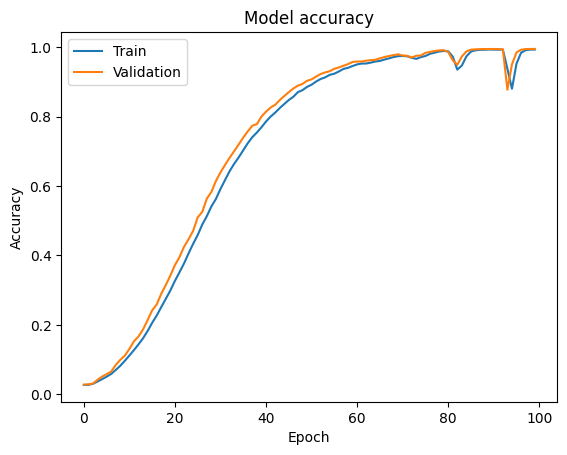

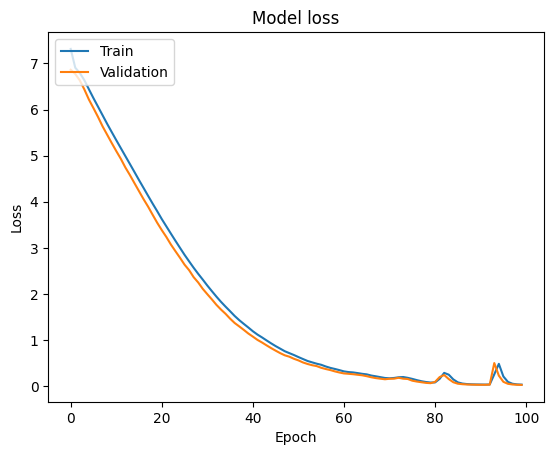

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Identificando as rimas presentes no texto

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

#Define uma expressão regular para encontrar a última palavra de cada linha
padrao_ultima_palavra = re.compile(r'\b(\w+)\s*$')

#Dicionário para armazenar as rimas por palavra final de linha
rimas_encontradas = {}

#Função para obter os 3 últimos caracteres de uma palavra
def obter_ultimos_tres_caracteres(palavra):
    return palavra[-3:]

#Ler o texto do arquivo letras.txt (texto pré-processado)
with open('letras.txt', 'r', encoding='utf-8') as file:
    corpus = file.read()

#Dividir o corpus em linhas
linhas = corpus.split('\n')

#Para cada linha no corpus, encontra a última palavra e tokeniza as rimas
for linha in linhas:
    match = padrao_ultima_palavra.search(linha.lower())
    if match:
        ultima_palavra = match.group(1)
        #Obter os 3 últimos caracteres da última palavra
        ultimos_tres_caracteres = obter_ultimos_tres_caracteres(ultima_palavra)
        #Adiciona a rima tokenizada ao dicionário de rimas usando a lógica dos 3 últimos caracteres
        if ultimos_tres_caracteres in rimas_encontradas:
            rimas_encontradas[ultimos_tres_caracteres].add(ultima_palavra.lower())
        else:
            rimas_encontradas[ultimos_tres_caracteres] = {ultima_palavra.lower()}

#Converter os conjuntos de rimas de volta para listas (se necessário)
for rima, palavras in rimas_encontradas.items():
    rimas_encontradas[rima] = list(palavras)

print("Rimas encontradas:")
print(rimas_encontradas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Rimas encontradas:
{'ei': ['ei'], 'sil': ['brasil'], 'ndo': ['ouvindo', 'gorando', 'andando', 'agonizando', 'esgotando', 'preparando', 'acabando', 'melhorando', 'quando', 'sorrindo', 'vendo', 'xingando', 'chegando', 'executando', 'vivendo', 'entrando', 'entendo', 'falando', 'arrebentando', 'guiando', 'traindo', 'chapando', 'abrindo', 'falhando', 'indo', 'pensando', 'vagabundo', 'expressando', 'rindo', 'matando', 'lucrando', 'nascendo', 'lutando', 'vindo', 'clareando', 'esperando', 'trincando', 'amando', 'comprando', 'valendo', 'jurando', 'viajando', 'orando', 'desfilando', 'morrendo', 'olhando', 'aparentando', 'rimando', 'observando', 'ligando', 'rezando', 'filmando', 'segundo', 'desprezando', 'firmando', 'fundo', 'roubando', 'mundo'], 'igo': ['antigo', 'perigo', 'abrigo', 'inimigo', 'comigo', 'amigo'], 'sso': ['posso', 'isso', 'rifasso', 'processo', 'disso', 'fracasso', 'osso', 'escasso', 'passo', 'compromisso', 'nosso'], 'uer': ['quer', 'sauer', 'heuer', 'qualquer'], 'eta': ['planeta

Biblioteca utilizada para corrigir palavras que possam estar incorretas na geração

In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 40.8 MB/s eta 0:00:00


## Função para gerar novas letras de RAP

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from spellchecker import SpellChecker

#Função para gerar texto rimando com base nas rimas encontradas
def generate_text(seed_text, next_words, model, max_sequence_len, grupo_rimas):
    spell_checker = SpellChecker(language='pt')
    generated_text = seed_text.strip()  #Inicializa o texto gerado com o seed_text e remove espaços extras
    words_generated = 0  #Contador para controlar o número de palavras geradas
    last_word = ""  #Variável para armazenar a última palavra gerada em cada iteração
    last_line_last_word = ""  #Variável para armazenar a última palavra da linha anterior
    line_count = 0  #Contador de linhas geradas

    while words_generated < next_words:
        if words_generated == 0:
            generated_text += "\n"

        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        
        #probabibilidades de predição
        predicted_probs = model.predict(token_list, verbose=0)[0]        
        predicted_index = np.argmax(predicted_probs)

        #Buscando palavra correspondente
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break

        #Encontra a palavra corrigida, se estiver incorreta
        corrected_word = spell_checker.correction(output_word)

        #Adiciona a palavra corrigida ao texto gerado e à semente
        seed_text += " " + corrected_word
        generated_text += " " + corrected_word
        words_generated += 1

        #Atualiza a última palavra gerada
        last_word = output_word

        #Se atingir o limite de palavras por linha, 
        #quebra a linha e atualiza a contagem de linhas
        if words_generated % 8 == 0:
            generated_text += "\n"
            line_count += 1

            #Verifica se é a primeira iteração para gerar apenas três linhas
            if words_generated == 8:
                line_count = 2

            #Pular uma linha a cada quatro linhas geradas
            if line_count % 4 == 0:
                generated_text += "\n"

            #Última palavra da linha atual
            last_line_words = generated_text.splitlines()[-1].split()
            last_line_last_word = last_line_words[-1].lower() if last_line_words else ""

            #Última palavra da linha anterior
            previous_line_words = generated_text.splitlines()[-2].split() if len(generated_text.splitlines()) > 1 else []
            previous_line_last_word = previous_line_words[-1].lower() if previous_line_words else ""

            #Há rimas disponíveis para a última palavra da linha anterior?
            if previous_line_last_word in grupo_rimas:
                available_rhymes = [rhyme for rhyme in grupo_rimas[previous_line_last_word] if rhyme.endswith(last_line_last_word)]
                if available_rhymes:
                    rhyme_word = np.random.choice(available_rhymes)
                    generated_text += " " + rhyme_word
                    seed_text += " " + rhyme_word
                else:
                    generated_text += " " + output_word
                    seed_text += " " + output_word
            else:
                generated_text += " " + output_word
                seed_text += " " + output_word

    return generated_text

# Exemplos de utilização

In [ ]:
generated_text = generate_text("A lua cheia, clareia as ruas do capão", 204, model, max_sequence_len-1, rimas_encontradas)
print(generated_text)

A lua cheia, clareia as ruas do capão
 acima de nós só deus humilde é nós
 nós fica perdida mulheres ligado vive se têm a
 a vida subiu a boca eu tive meu corpo

 corpo a testemunha é calada de asfalto te imita
 imita desprezo então o seu osso eu sou pôr
 pôr na sarjeta no barril barril barril barril barril
 brasil aí é se errei para você gosta de

 de meu pai tá as flores da ponte para
 pra ser não vou encontrar o cá agora precisa
 precisa não vou dizer ninguém ninguém tá na rua
 rua não foi embalado embalado embalado embalado embalado embalado

 embaçado por ceguinho ceguinho ceguinho ceguinho ceguinho ceguinho ceguinho
 neguinho na selva mais o que vinho acha que
 que é bem ganharam aqui você vai sabe o
 o tempo será de lá vai ser a fita

 fita ao problema será de justiça irmão meu rei
 rei a lua escura no homem para to no
 no coração uma próprias lágrimas la uma viela em
 em seu todas de novo do barril barril barril

 brasil broca broca broca broca broca broca broca broca
 brown eu

In [ ]:
generated_text = generate_text("Tem que ser, tem que pa", 204, model, max_sequence_len-1, rimas_encontradas)
print(generated_text)

Tem que ser, tem que pa
 é pouco dia periferia é desabado muito mano
 mano então nem já não acho que você tá
 tá tudo se tocar só isso 3 pagando de

 de quem não sei responder todo celular não conhece
 conhece todos esse faz mano aqui os aliado foi
 foi grana mas ela tem que você viu nessa
 nessa que diz que só roubar em dinheiro igual

 igual de sócio o dia que é mano firmeza
 firmeza vamos sempre vive fica fica nem aí é
 né a favela na área assim se lembre ao
 ao lado cada um dois puro para dinheiro pelo

 pelo júri é periferia já diz meu mestre parece
 parece uma doença não é rico em cupão cupão
 cuzão na esquina as deixem em sol local e
 e veja seu som para que as conquistas metralhado

 metralhado 4 branca e carente o mundo é má
 má sem dez dos trevas tradição de sina lenta
 lenta uma nossa sangue onde é muito uma vida
 vida sem si não é mulher mas ele ainda

 ainda tá entre o bane bane bane bane bane
 bang pique e seis de monte por ódio hã
 hã da bala só do dia de pensar ele
 ele

In [ ]:
generated_text = generate_text("Cotidiano na periferia e as dificuldades", 204, model, max_sequence_len-1, rimas_encontradas)
print(generated_text)

Cotidiano na periferia e as dificuldades
 a cadeia e alguém hã nego te deixa
 deixa porque que e ontem eu quero esse xá
 x2 igual o frio ele era os manos na

 na lado do outro for ele vai em onde
 onde para um monstro e da lei da selva
 selva é necessário aqui não sabe disso se não
 não vivo qual lá é hoje cê tem mais

 mais que ninguém quer ter mais dólar e sair
 sair os sério qualquer pior do capão cinco na
 na esquina no remetente e ele morre o minha
 minha mão não quer mais as famílias dinheiro eu

 eu conseguir um corre por você e os manos
 manos mas sem gamba gamba gamba gamba gamba gamba
 gambé vem no chão tem continuar se vale a
 a cara é o sangue dele perde a madrugada

 madrugada na distância nível a alma me mostra a
 a ingrata vela hoje a noite era hoje que
 que não cachimbar de lutar complexo policia pobres essa
 essa final tio e mulher entre uma solução na

 na sul mas ainda ter um agradar aqui mas
 mas quem é mais bem fácil o governo pode
 pode ver um dois boa se aventuro

In [ ]:
generated_text = generate_text("A vida é diferente, da ponte pra cá", 204, model, max_sequence_len-1, rimas_encontradas)
print(generated_text)

A vida é diferente, da ponte pra cá
 tem que ser tem que pá o mundo
 mundo sendo massacrado no gueto é muito 10 importado
 importado mesmo fica então com o amor pode ver

 ver um advogado pro salve igual o tempo por
 por final você diz que tem ruim ficou por
 vapor mil a vida nas próprias destruição aponta a
 a atualidade nada nem falei horas devagar gosto os

 os pique o nosso horizonte de suspeitos quebrado também
 também do tempo na mão como ainda é nego
 nego me vê eu digo por mim a banca
 banca e o movimento é quente não vai sair

 sair ele fora então vamos horas pagando para toda
 foda deixa meu notário notário notário notário notário notário
 otário enfim atrás da quebrada baralho disse quem vai
 vai aqui vai vocês tudo muito o quê cê

 cê é mais vale o que valor é o
 o inferno meu gente está na esquina deus tá
 tá ao cena tão eu também ouvir para o
 o cara de você viu pensa na minha cara

 cara um negócios periferia mano ouviu comigo fica a
 a raça que saber para de que tem la


# Conclusões

Os resultados iniciais são animadores e trazem ânsia de aplicar uma nova abordagem, talvez utilizar ambientes pagos para fazer a execução do treinamento e tentar inferir com um modelo mais fino. A inserção de modelos pré-treinados supracitados neste estudo é vista com entusiasmo para aproveitar o ambiente mais parrudo e apropriado para fazer as simulações. Sendo assim, outras técnicas de ajuste fino e regularização do modelo podem ser aplicadas, em busca de melhorar a acurácia das predições e, consequentemente, diminuir a perda durante as épocas de treinamento.

O desenvolvimento de uma rede neural para geração de novas letras de RAP é um desafio que traz a tona a correlação entre tecnologia e arte, em busca de aproximar-se do pensamento humano e suas formas de expressão. Além de ser uma homenagem a um dos maiores grupos de RAP da história, que são referências para tantas pessoas.

# Referências

* Satija, V. (2017). Rhymenet. https://github.com/vidursatija/rhymenet.
[Acesso em 21 jun. 2024].
* Souza, F., Nogueira, R., and Lotufo, R. (2020). BERTimbau: pretrained BERT models for Brazilian Portuguese. In 9th Brazilian Conference on Intelligent Systems, BRACIS, Rio Grande do Sul, Brazil, October 20-23 (to appear). [Acesso em 28 jun. 2024].
* Anand, A., Anand, A., Maiyuran, J., and Shum, M. Rap lyric generation: A phoneme-based lstm approach. [Acesso em 21 jun. 2024].
* Barrat, R. (2018). Rapping-neural-network. https://github.com/
robbiebarrat/rapping-neural-network. [Acesso em 21 jun. 2024].
* Draca, N. (2017). rddt. https://github.com/nikodraca/rddt. [Acesso em
21 jun. 2024].
* Guillou, P. (2020). Gportuguese-2 (portuguese gpt-2 small): a language model for portuguese text generation (and more nlp tasks...). [Acesso em 28 jun. 2024].
* JotaChina. Computer intelligence. https://github.com/JotaChina/
Computer-intelligence. [Acesso em 21 jun. 2024].
* Juliani, J. d. S. (2019). Gerando letras musicais utilizado uma rede neural recorrente lstm-long short-term memory. [Acesso em 21 jun. 2024].
* Leme, L. (2024). Finbert-pt-br. https://huggingface.co/lucas-leme/ FinBERT-PT-BR. [Acesso em: 25 jun. 2024].
* Letras.mus.br. Racionais mc’s. https://www.letras.mus.br/racionais-mcs/. [Acesso em 21 jun. 2024].
* Potash, P., Romanov, A., and Rumshisky, A. (2015). Ghostwriter: Using an lstm for automatic rap lyric generation. In Proceedings of the 2015 Conference on Empirical Methods in Natural Language Processing, pages 1919–1924. [Acesso em 21 jun. 2024].



